In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

C:\ProgramData\Anaconda3\envs\studying\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\envs\studying\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
16/16 [==============================] - 0s 18ms/step - loss: 2.6482 - accuracy: 0.5412 - val_loss: 1.7558 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4289 - accuracy: 0.7042 - val_loss: 1.3148 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0535 - accuracy: 0.7764 - val_loss: 1.1381 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8263 - accuracy: 0.8280 - val_loss: 1.0218 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6640 - accuracy: 0.8633 - val_loss: 0.9627 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5304 - accuracy: 0.8913 - val_loss: 0.9256 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4282 - accuracy: 0.9124 - val_loss: 0.8896 - val_accuracy: 0.8200
Epoch 8/20
16

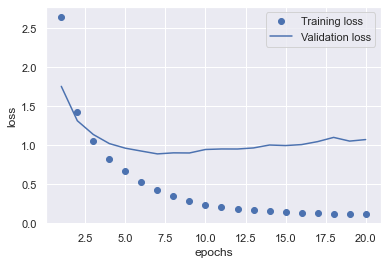

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

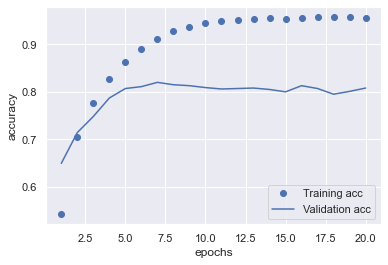

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 17ms/step - loss: 2.6554 - accuracy: 0.5509 - val_loss: 1.7418 - val_accuracy: 0.6440
Epoch 2/9
16/16 [==============================] - 0s 11ms/step - loss: 1.4035 - accuracy: 0.7105 - val_loss: 1.2915 - val_accuracy: 0.7170
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0494 - accuracy: 0.7717 - val_loss: 1.1371 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.8425 - accuracy: 0.8146 - val_loss: 1.0661 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6833 - accuracy: 0.8543 - val_loss: 0.9812 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5462 - accuracy: 0.8877 - val_loss: 0.9473 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.4410 - accuracy: 0.9078 - val_loss: 0.9111 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [14]:
results

[0.9984504580497742, 0.7867319583892822]

In [15]:
predictions = model.predict(x_test)

In [16]:
predictions[0].shape

(46,)

In [17]:
np.argmax(predictions[0])

4